In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

**Creating a sinusoidal dataset & Savind it as a .csv file**

Sine Wave: **A sin(ωt)**

A-Amplitude
t-Time
ω-Frequency

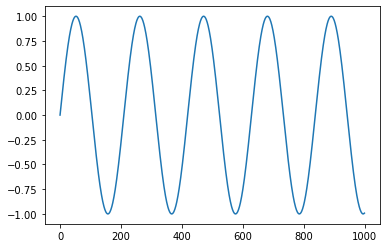

In [2]:
np.random.RandomState(123)
time= np.arange(0,10,0.01)
amp= np.sin(time*3)
plt.plot(amp)

Calculating the wavelength of the generated wave

In [3]:
#Wavelength is calculated by finding the index of the first peak and multiplying the index by 4 as the movement from 0 to the peak compose the 25% of a sine wave
for i in range(0,len(time)):
    if amp[i]<=amp[i+1]:
        continue
    else:
        break
wv=i*4
print(wv)

208


Adding noise to the wave

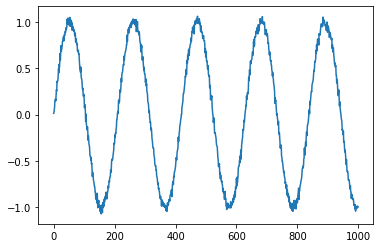

In [4]:
y= amp + np.random.normal(scale=0.03, size=1000) 
plt.plot(y)
sineData = pd.DataFrame(y, columns = ['DataPoints'])
sineData.to_csv(r'./SineWaveData.csv', index=False)

**Importing the .csv file**

In [5]:
sinedata = pd.read_csv('./SineWaveData.csv')

**Creating an anomaly**

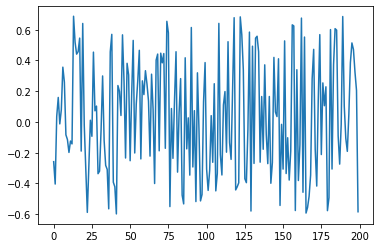

In [6]:
time1=np.arange(0,2,0.01)
anomaly=np.random.uniform(-0.6, 0.7,size=200)
plt.plot(anomaly)

**Randomly inserting the anomaly into the wave**

In [7]:
random_index = random.sample(range(0, 801),1)
print(random_index)
ind=random_index[0]
for i in range(ind, (ind+200)):
    sinedata.iloc[[i]]=sinedata.iloc[[i]]+ anomaly[i-ind]

[369]


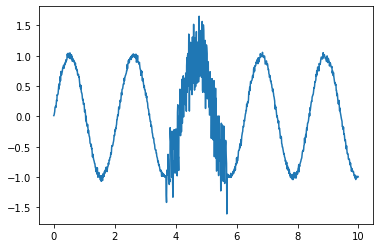

In [8]:
plt.plot(time,sinedata)

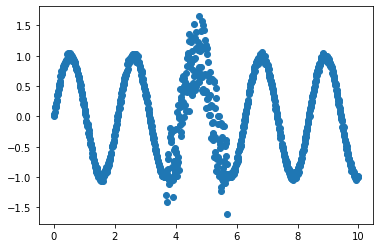

In [9]:
plt.scatter(time,sinedata)

Creating a sample wave

In [10]:
#Sample wave was generated by taking the average of the points that corresponds to the same position at each wave
avg_values=[]
a=np.arange(0,wv,1)
for i in a:
    val1=[]
    for j in range(i,1000,wv):
        val1.append(sinedata.DataPoints[j])
    avg=sum(val1)/len(val1)
    avg_values.append(avg)

floor_division=1000//wv
remains=1000-(wv*floor_division)

#Creating a repetiting list for the dataset
list1=avg_values*floor_division
list2=avg_values[0:remains]
rep_avg_values=list1+list2 
sinedata['SampleWaveData']=rep_avg_values

**Anomaly Detection with Isolation Forest**

In [11]:
data=sinedata[['DataPoints', 'SampleWaveData']]
model=IsolationForest(n_estimators=200, max_features=2, max_samples= 0.8, random_state=1)
model.fit(data)

IFmodel=pd.DataFrame()
IFmodel['Time Points']=time
IFmodel['Data Points']=sinedata['DataPoints']
IFmodel['scores']=model.decision_function(data)
IFmodel['anomaly']=model.predict(data)

In [12]:
#How many points from the data was assumed to be an anomaly
#-1 stands for anomaly and 1 stands for normal instance
IFmodel['anomaly'].value_counts()

 1    856
-1    144
Name: anomaly, dtype: int64

In [13]:
#How many points within the anomaly region determined to be an anomaly
IFmodel['anomaly'][ind:(ind+200)].value_counts()

-1    110
 1     90
Name: anomaly, dtype: int64

**Visualization of the Data with Anomalies Highlighted**

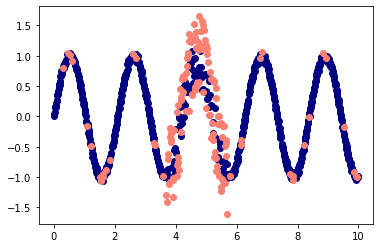

In [14]:
sc1 = plt.scatter('Time Points', 'Data Points', color='navy', data=IFmodel[IFmodel['anomaly']==1])
sc2 = plt.scatter('Time Points', 'Data Points', color='salmon', data=IFmodel[IFmodel['anomaly']==-1])
plt.show()

**Anomaly Detection with One-Class SVM**

In [15]:
oneclass = OneClassSVM(kernel='rbf', gamma=14.5, nu=0.2)
oneclass.fit(data)

SVMmodel=pd.DataFrame()
SVMmodel['Time Points']=time
SVMmodel['Data Points']=sinedata['DataPoints']
SVMmodel['score']=oneclass.decision_function(data)
SVMmodel['anomaly']=oneclass.predict(data)

In [16]:
#How many points from the data was assumed to be an anomaly
SVMmodel['anomaly'].value_counts()

 1    800
-1    200
Name: anomaly, dtype: int64

In [17]:
#How many points within the anomaly region determined to be an anomaly
SVMmodel['anomaly'][ind:(ind+200)].value_counts()

-1    132
 1     68
Name: anomaly, dtype: int64

**Visualization of the Data with Anomalies Highlighted**

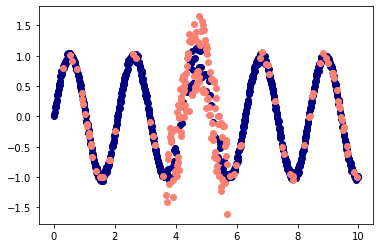

In [18]:
sc1 = plt.scatter('Time Points', 'Data Points', color='navy', data=SVMmodel[SVMmodel['anomaly']==1])
sc2 = plt.scatter('Time Points', 'Data Points', color='salmon', data=SVMmodel[SVMmodel['anomaly']==-1])
plt.show()

**Comparison between models**

In [19]:
anm_tot=[]
for i in IFmodel['anomaly']:
    if (i==-1)==True:
        anm_tot.append(1)
anm_det=[]

for i in IFmodel['anomaly'][ind:(ind+200)]:
    if (i==-1)==True:
        anm_det.append(1)
print('Anomalies detected at the problematic region compose ', "{:.2f}".format((sum(anm_det)/sum(anm_tot))*100), '% of the total anomalies detected via isolation forest')

Anomalies detected at the problematic region compose  76.39 % of the total anomalies detected via isolation forest


In [20]:
anm_tot1=[]
for i in SVMmodel['anomaly']:
    if (i==-1)==True:
        anm_tot1.append(1)
anm_det1=[]
for i in SVMmodel['anomaly'][ind:(ind+200)]:
    if (i==-1)==True:
        anm_det1.append(1)

print('Anomalies detected at the problematic region compose ',"{:.2f}".format((sum(anm_det1)/sum(anm_tot1))*100), '% of the total anomalies detected via one class SVM')

Anomalies detected at the problematic region compose  66.00 % of the total anomalies detected via one class SVM
